# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model and preferences
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass as HSMC


# Question 1

**Explain how you solve the model**

/Users/Frede/Documents/polit/m/projects-2023-leif/inauguralproject/inauguralproject.py:66: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-8)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-8))**(par.sigma/(par.sigma+1e-8-1))


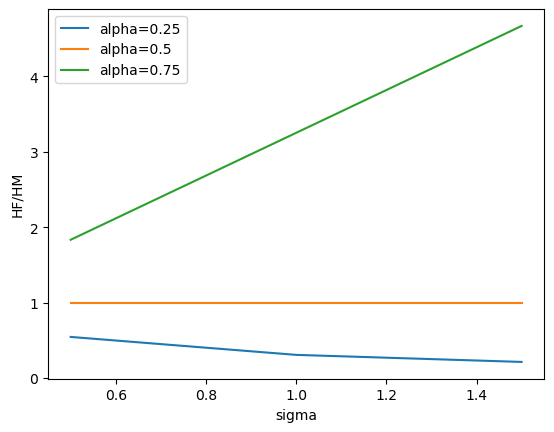

In [2]:
# create instance of the model
model1 = HSMC()

# define values of alpha and sigma to loop through
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

# loop through all combinations of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        # set values of alpha and sigma in the model
        model1.par.alpha = alpha
        model1.par.sigma = sigma
        
        # solve the model and store the result
        opt = model1.solve_discrete()
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM

# plot the results
fig, ax = plt.subplots()
for alpha in alpha_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for sigma in sigma_values]
    ax.plot(sigma_values, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()


# Question 2

Explain your code and procedure

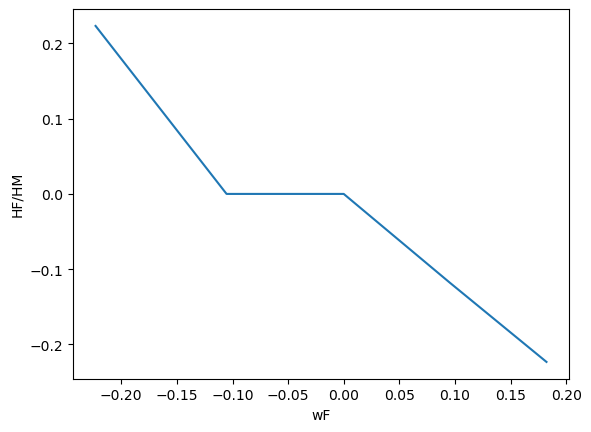

{0.8: 5.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.0, 1.2: 4.0}
{0.8: 4.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.5, 1.2: 5.0}


In [3]:
# create instance of the model
model2 = HSMC()

# define values of alpha and sigma to loop through
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]


# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

for wF in wF_values:
    # set values of alpha and sigma in the model
    model2.par.wF = wF
        
    # solve the model and store the result
    opt = model2.solve_discrete()
    resultsHF[wF] = opt.HF
    resultsHM[wF] = opt.HM

# plot the results
fig, ax = plt.subplots()
for wf in wF_values:
    y = [np.log(resultsHF[wF]/resultsHM[wF]) for wF in wF_values]
ax.plot(np.log(wF_values),y)
ax.set_xlabel("wF")
ax.set_ylabel("HF/HM")
plt.show()

print(resultsHF)
print(resultsHM)



Når den relative løn for kvinder falder, vil de bruge mere tid hjemme... noget mere :)

# Question 3

Explain your code and procedure

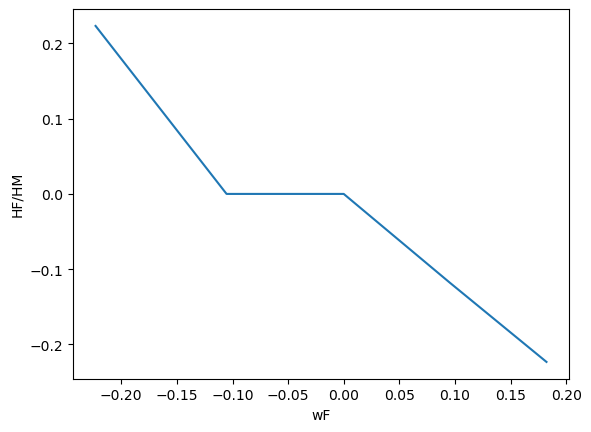

In [4]:
# code
model3 = HSMC()

# define values of alpha and sigma to loop through
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]


# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

for wF in wF_values:
    # set values of alpha and sigma in the model
    model3.par.wF = wF
        
    # solve the model and store the result
    opt = model3.solve()
    resultsHF[wF] = opt.HF
    resultsHM[wF] = opt.HM

# plot the results
fig, ax = plt.subplots()
for wf in wF_values:
    y = [np.log(resultsHF[wF]/resultsHM[wF]) for wF in wF_values]
ax.plot(np.log(wF_values),y)
ax.set_xlabel("wF")
ax.set_ylabel("HF/HM")
plt.show()

ADD CONCISE CONLUSION.

In [7]:
model5 = HSMC()
model5.run_regression()


Unexpected exception formatting exception. Falling back to standard exception


/Users/Frede/Documents/polit/m/projects-2023-leif/inauguralproject/inauguralproject.py:168: RuntimeWarning: invalid value encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)
Traceback (most recent call last):
  File "/Users/Frede/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7y/snczg3pd66s85jwr8746xgd00000gn/T/ipykernel_35448/430416740.py", line 2, in <module>
    model5.run_regression()
  File "/Users/Frede/Documents/polit/m/projects-2023-leif/inauguralproject/inauguralproject.py", line 172, in run_regression
    z = y = sol.beta0 + sol.beta1*A*x
ValueError: operands could not be broadcast together with shapes (5,2) (5,) 

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Frede/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
   

Lave kontinuerlig tidsinterval i opgave 3 

- - - - - -

Lave regressionen i opgave 4 (ingen convergens - se ovenstående)

- - - - - - 

Gode råd til opgave 5
